In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import plotly.express as px

### *Carga de Dataset y Conexion a Colab*

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Live.csv'
df = pd.read_csv(data_path, encoding='latin-1')
df.head()

,ï»¿status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### *Visualizacion de filas y columnas*

In [ ]:
df.shape

(7050, 16)

### *Detrminacion de datos vacios y determinacion de columnas*

In [ ]:
df.isnull().sum()

ï»¿status_id           0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [ ]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4', 'ï»¿status_id', ], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [ ]:
df.shape

(7050, 11)

In [ ]:
df.dropna(axis=0, inplace=True)
df.shape

(7050, 11)

In [ ]:
df.columns

Index(['status_type', 'status_published', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys'],
      dtype='object')

In [ ]:
df.dtypes

status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [ ]:
df['status_published'] = pd.to_datetime(df['status_published'])

### *Determinacion de tipo de columnas*

In [ ]:
df.dtypes

status_type                 object
status_published    datetime64[ns]
num_reactions                int64
num_comments                 int64
num_shares                   int64
num_likes                    int64
num_loves                    int64
num_wows                     int64
num_hahas                    int64
num_sads                     int64
num_angrys                   int64
dtype: object

In [ ]:
def expand_df(df):
    data = df.copy()
    
    data['day'] = data.status_published.dt.day
    data['month'] = data.status_published.dt.month
    data['year'] = data.status_published.dt.year
    data['date'] = data.status_published.dt.date

    return data

df1 = expand_df(df)
display(df)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0
7046,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0
7047,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0
7048,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0


In [ ]:
df1.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,date
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,22,4,2018,2018-04-22
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,21,4,2018,2018-04-21
2,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,21,4,2018,2018-04-21
3,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,21,4,2018,2018-04-21
4,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,18,4,2018,2018-04-18


In [ ]:
df1.drop(['status_published'], axis=1, inplace=True)

In [ ]:
df1.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,date
0,video,529,512,262,432,92,3,1,1,0,22,4,2018,2018-04-22
1,photo,150,0,0,150,0,0,0,0,0,21,4,2018,2018-04-21
2,video,227,236,57,204,21,1,1,0,0,21,4,2018,2018-04-21
3,photo,111,0,0,111,0,0,0,0,0,21,4,2018,2018-04-21
4,photo,213,0,0,204,9,0,0,0,0,18,4,2018,2018-04-18


In [ ]:
df1.dtypes

status_type      object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
day               int64
month             int64
year              int64
date             object
dtype: object

# Analisis Estadistico

In [ ]:
def getContinuesCols(df):
    colnames = df1.columns
    numeric_continues_vars = []
    for col in colnames:
        unique_values =len (df1[col].unique())
        if((df1[col].dtype != 'object') and (unique_values > 3)):
            numeric_continues_vars.append(col)
    return numeric_continues_vars

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def getColumnsDataTypes(df):

    categoric_vars = []
    discrete_vars = []
    continues_vars = []

    for colname in df.columns:
        if(df[colname].dtype == 'object'):
            categoric_vars.append(colname)
        else:
            cantidad_valores = len(df[colname].value_counts())
            if(cantidad_valores <= 3):
                discrete_vars.append(colname)
            else:
                continues_vars.append(colname)

    return categoric_vars, discrete_vars, continues_vars

In [ ]:
numeric_cont_vars = getContinuesCols(df1)
numeric_cont_vars

['num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys',
 'day',
 'month',
 'year']

In [ ]:
def plot_density_variable(df, variable):
    
    plt.figure(figsize = (15,6))
    plt.subplot(121)
    df[variable].hist(bins=30)
    plt.title(variable)
    
    plt.subplot(122)
    stats.probplot(df1[variable], dist="norm", plot=plt)
    plt.show()

### *Gráfica del histograma y distribución de las variables numéricas continuas*

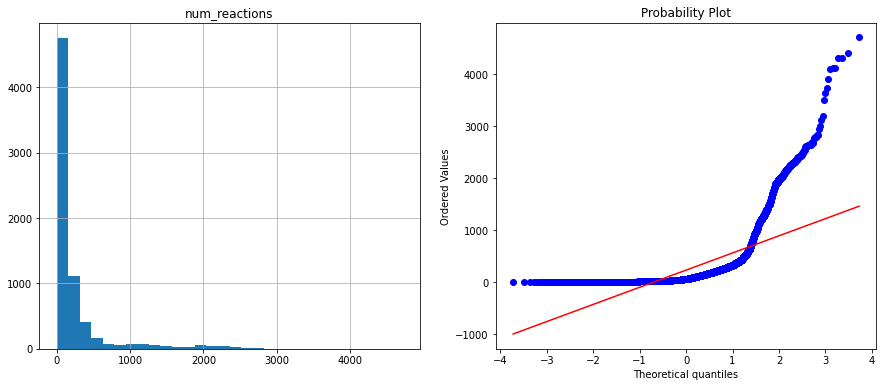

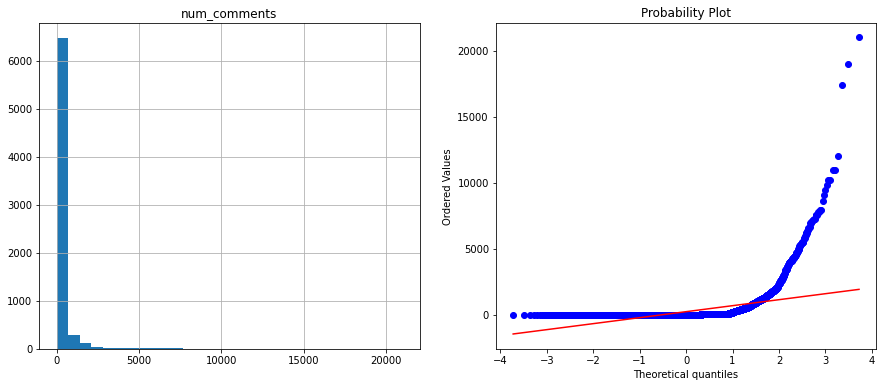

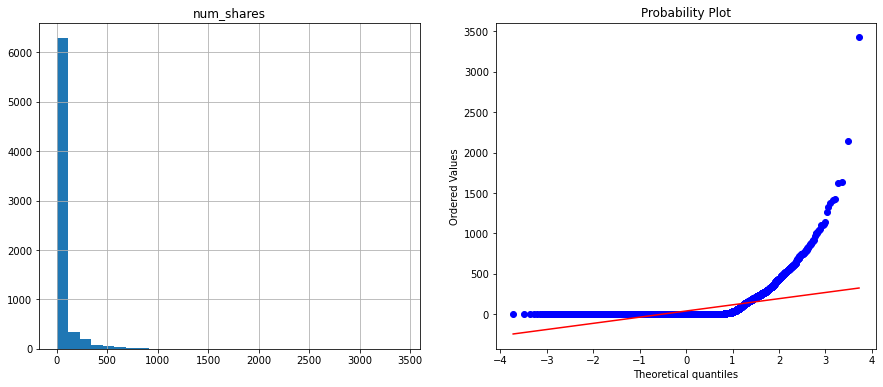

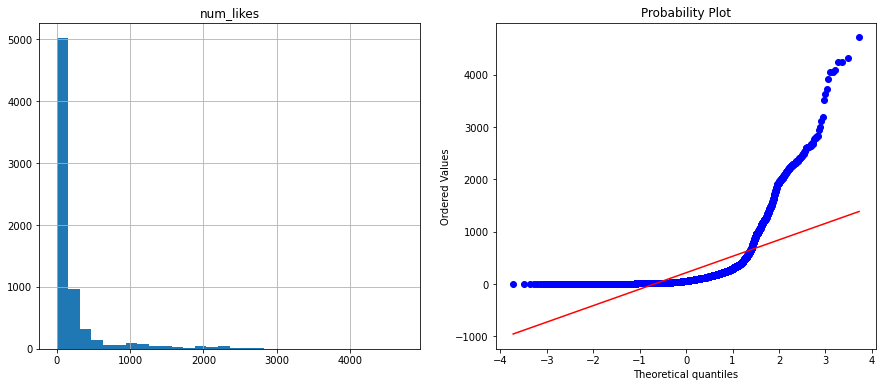

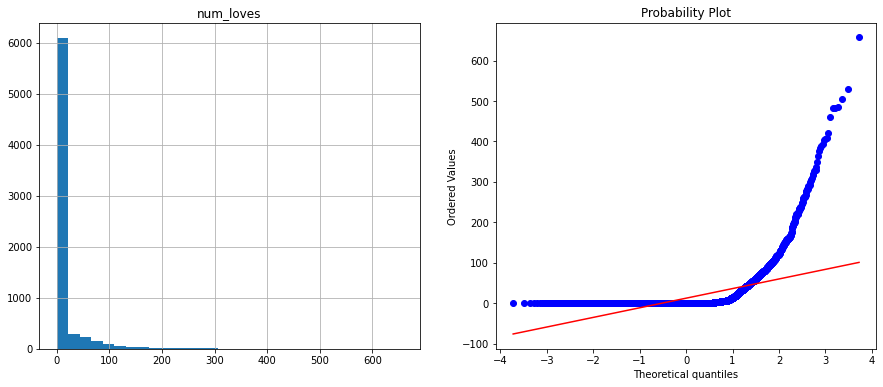

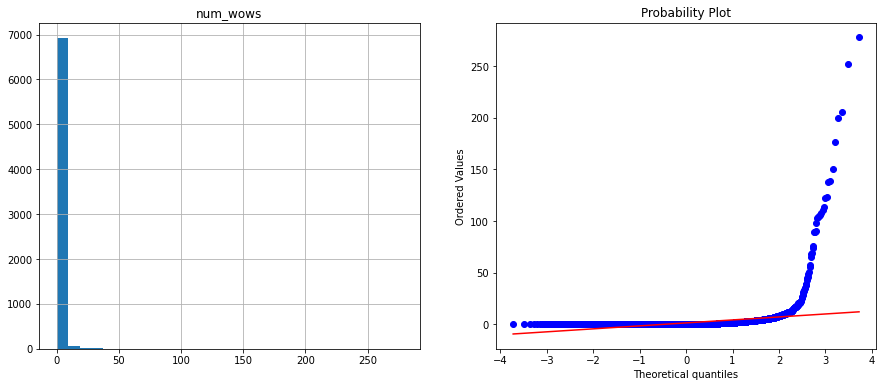

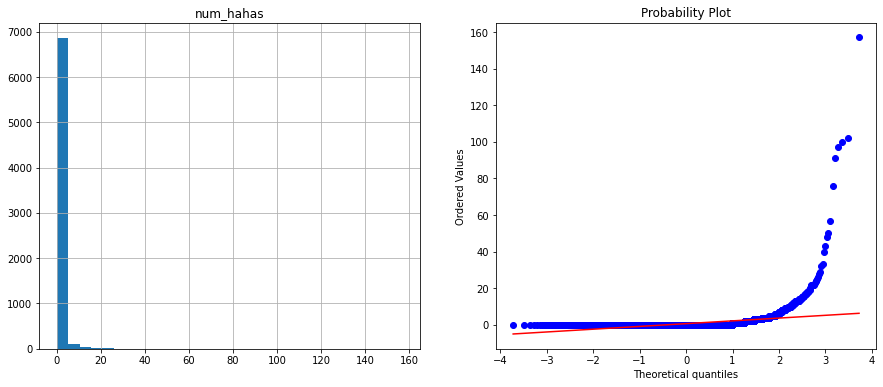

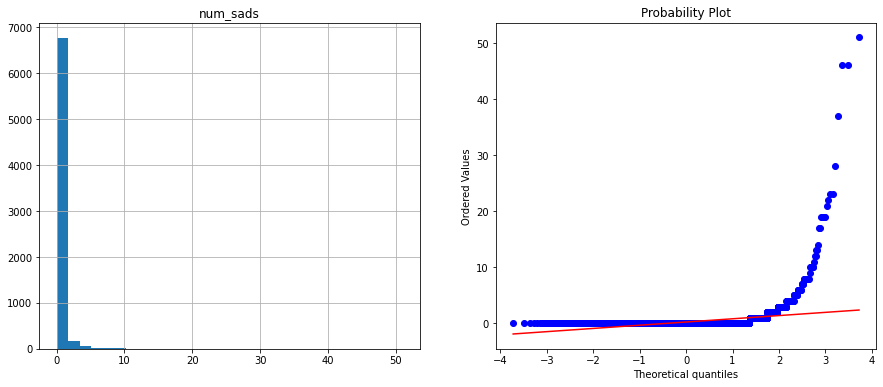

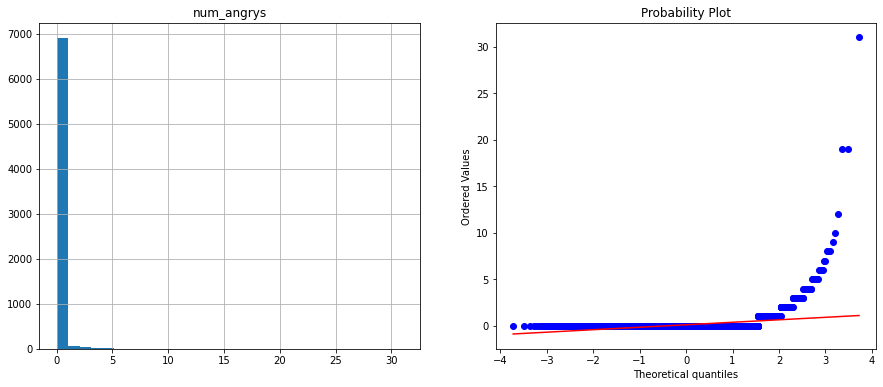

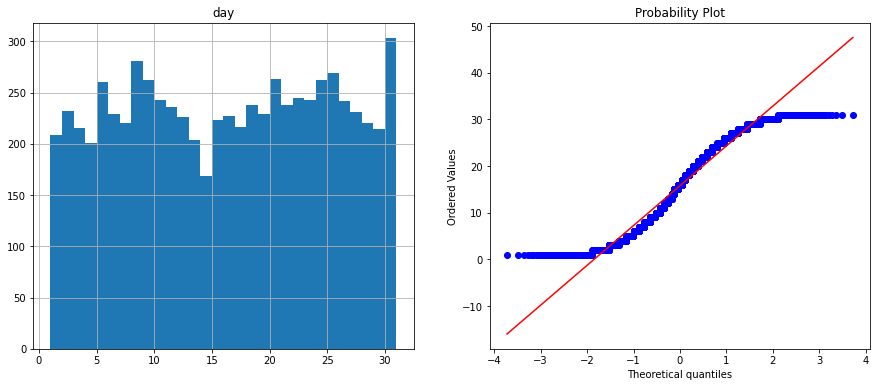

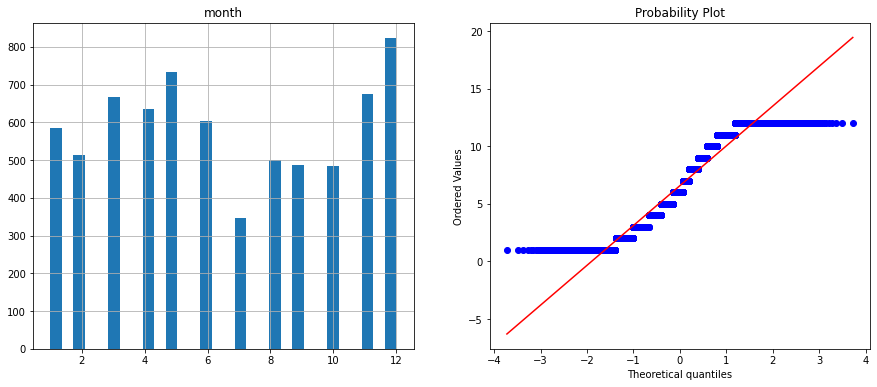

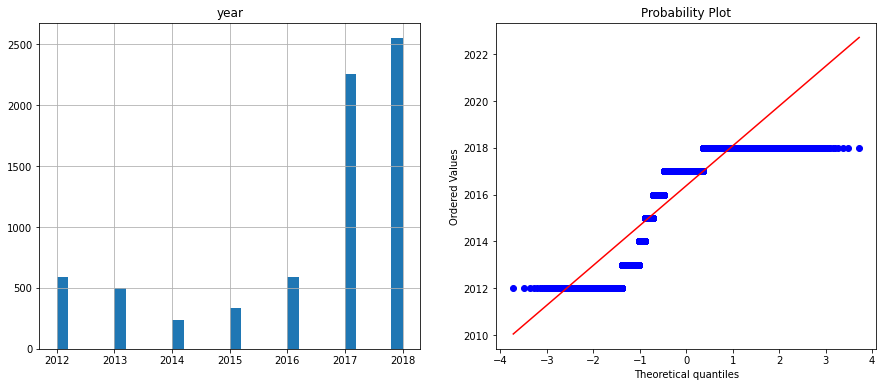

In [ ]:
for colnames  in numeric_cont_vars:
        plot_density_variable(df1, colnames )

### *Distribucion de promedio, mediana, desviacion estandar, Min, Max*

In [ ]:
df1.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,15.792624,6.577730,2016.382128
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,8.728489,3.587108,1.943176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2012.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,2016.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,6.000000,2017.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,23.000000,10.000000,2018.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,31.000000,12.000000,2018.000000


# Muestre una gráfica de serie temporal (debe ordenar las fechas) para cada tipo de entidad:


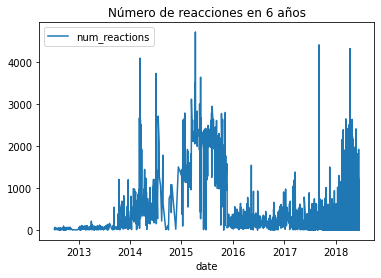

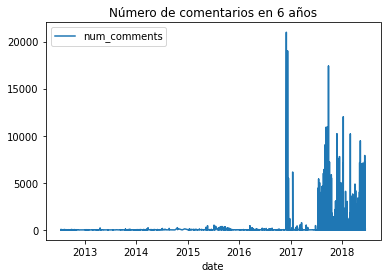

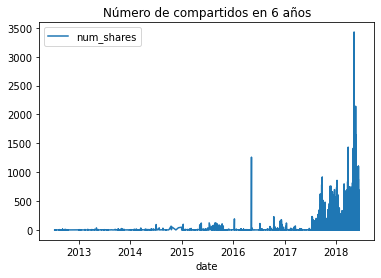

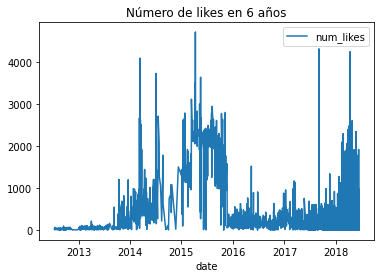

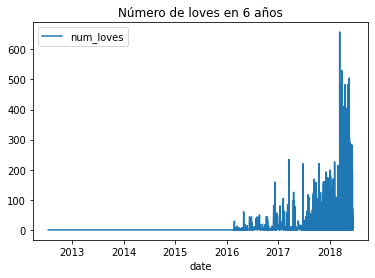

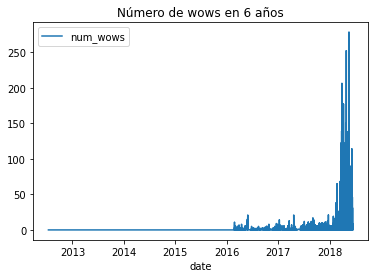

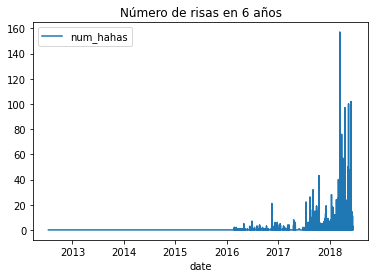

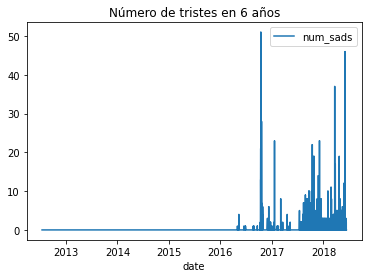

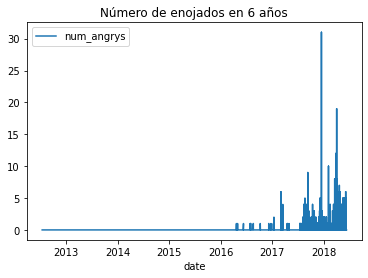

In [ ]:
df1.plot( 'date' , 'num_reactions',  ) 
plt.title("Número de reacciones en 6 años")
plt.show()
df1.plot( 'date' , 'num_comments',  ) 
plt.title("Número de comentarios en 6 años")
plt.show()
df1.plot( 'date' , 'num_shares',  ) 
plt.title("Número de compartidos en 6 años")
plt.show()
df1.plot( 'date' , 'num_likes',  ) 
plt.title("Número de likes en 6 años")
plt.show()
df1.plot( 'date' , 'num_loves',  ) 
plt.title("Número de loves en 6 años")
plt.show()
df1.plot( 'date' , 'num_wows',  ) 
plt.title("Número de wows en 6 años")
plt.show()
df1.plot( 'date' , 'num_hahas',  ) 
plt.title("Número de risas en 6 años")
plt.show()
df1.plot( 'date' , 'num_sads',  ) 
plt.title("Número de tristes en 6 años")
plt.show()
df1.plot( 'date' , 'num_angrys',  ) 
plt.title("Número de enojados en 6 años")
plt.show()

### *Tratamiento de Outliers*

In [ ]:
df1[df1['num_reactions'] >= 4500]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,date
1229,photo,4710,50,1,4710,0,0,0,0,0,10,4,2015,2015-04-10


In [ ]:
df1[df1['num_comments'] >= 15500]


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,date
480,video,452,19013,161,353,92,2,3,2,0,9,12,2016,2016-12-09
498,video,564,20990,154,473,82,3,3,3,0,30,11,2016,2016-11-30
6757,video,708,17404,913,525,157,6,14,4,2,25,9,2017,2017-09-25


In [ ]:
df1[df1['num_shares'] >= 2000]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,date
4518,video,1741,2257,2139,1155,504,69,11,2,0,20,5,2018,2018-05-20
4543,video,1970,2903,3424,1330,482,138,13,5,2,9,5,2018,2018-05-09


In [ ]:
df1[df1['num_likes'] >= 4700]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,date
1229,photo,4710,50,1,4710,0,0,0,0,0,10,4,2015,2015-04-10


In [ ]:
df1[df1['num_loves'] >= 550]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,date
4660,video,2639,1625,675,1753,657,68,157,0,4,13,3,2018,2018-03-13


In [ ]:
df1[df1['num_wows'] >= 220]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,date
4526,video,1678,1499,685,1227,165,278,8,0,0,17,5,2018,2018-05-17
4565,video,2237,2571,815,1591,376,252,15,1,2,28,4,2018,2018-04-28


In [ ]:
df1[df1['num_hahas'] >= 120]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,date
4660,video,2639,1625,675,1753,657,68,157,0,4,13,3,2018,2018-03-13


In [ ]:
df1[df1['num_sads'] >= 50]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,date
573,photo,295,3,10,243,1,0,0,51,0,14,10,2016,2016-10-14


In [ ]:
df1[df1['num_angrys'] >= 30]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,date
3313,photo,215,44,0,176,1,3,4,0,31,17,12,2017,2017-12-17


In [ ]:
outliers = df[( (df1['num_reactions'] >= 4500) | (df1['num_comments'] >= 15500) | (df1['num_shares'] >= 2000) | (df1['num_likes'] >= 4700) | (df1['num_loves'] >= 550) | (df1['num_wows'] >= 220) | (df1['num_hahas'] >= 120) | (df1['num_sads'] >= 50) | (df1['num_angrys'] >= 30) )].index

In [ ]:
df1.drop(outliers, inplace=True)


In [ ]:
df1.shape

(7039, 14)

### *Codificación de Variables Catetgóticas*

In [ ]:
df1['status_type'] = df1['status_type'].astype('category')


In [ ]:
df1.dtypes

status_type      category
num_reactions       int64
num_comments        int64
num_shares          int64
num_likes           int64
num_loves           int64
num_wows            int64
num_hahas           int64
num_sads            int64
num_angrys          int64
day                 int64
month               int64
year                int64
date               object
dtype: object

In [ ]:
df1['TotalI'] = df1['num_reactions']+df1['num_comments']+df1['num_shares']

In [ ]:
df1.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,month,year,date,TotalI
0,video,529,512,262,432,92,3,1,1,0,22,4,2018,2018-04-22,1303
1,photo,150,0,0,150,0,0,0,0,0,21,4,2018,2018-04-21,150
2,video,227,236,57,204,21,1,1,0,0,21,4,2018,2018-04-21,520
3,photo,111,0,0,111,0,0,0,0,0,21,4,2018,2018-04-21,111
4,photo,213,0,0,204,9,0,0,0,0,18,4,2018,2018-04-18,213


In [ ]:
df1.shape

(7039, 15)

In [ ]:
customer_df = df1.groupby('status_type').agg({'TotalI': ['mean', 'sum', 'max']})
customer_df = pd.DataFrame(customer_df)
customer_df.columns = ['Mean', 'Sum', 'Max']
customer_df.head()

,Mean,Sum,Max
status_type,,,
link,380.238095,23955,2215
photo,198.734189,851576,10491
status,477.580822,174317,3093
video,1006.793637,2341802,13483


In [ ]:
customer_df.shape

(4, 3)

### *Estandarización de Variables*

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_df.values)
scaled_features

array([[-0.45109201, -0.89842913, -1.06476501],
       [-1.05489594,  0.00399462,  0.66121584],
       [-0.1272647 , -0.73447699, -0.88165588],
       [ 1.63325266,  1.6289115 ,  1.28520505]])

In [ ]:
Ks = range(1, 5)
variabilidad = []


In [ ]:
for k in Ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_features)
    variabilidad.append(model.inertia_)

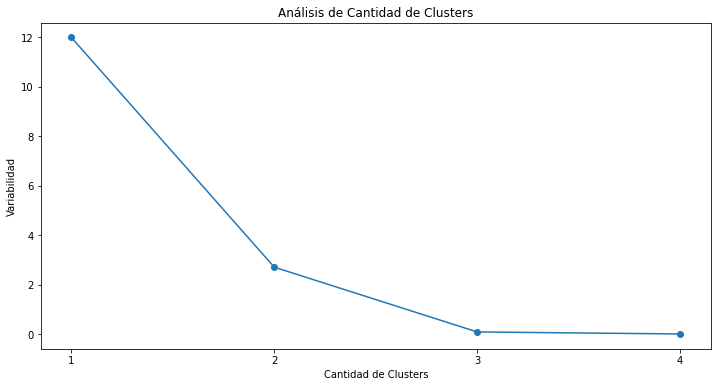

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(Ks, variabilidad, '-o')
plt.title("Análisis de Cantidad de Clusters")
plt.xlabel("Cantidad de Clusters")
plt.ylabel("Variabilidad")
plt.xticks(Ks)
plt.show()

### Modelo K-Means con K = 3

In [ ]:
MODEL = KMeans(n_clusters=3)
MODEL.fit(scaled_features)

KMeans(n_clusters=3)

In [ ]:
customer_df['Cluster'] = MODEL.predict(scaled_features)
customer_df.head()

,Mean,Sum,Max,Cluster
status_type,,,,
link,380.238095,23955,2215,2
photo,198.734189,851576,10491,0
status,477.580822,174317,3093,2
video,1006.793637,2341802,13483,1


In [ ]:
fig = px.scatter_3d(data_frame=customer_df, x='Max', y='Mean', z='Sum', color='Cluster')

In [ ]:
fig.show()

# Aplicacion de PCA

In [ ]:
X = df1.iloc[:, 2:10]
y = df1['status_type']

In [ ]:
X.dtypes

num_comments    int64
num_shares      int64
num_likes       int64
num_loves       int64
num_wows        int64
num_hahas       int64
num_sads        int64
num_angrys      int64
dtype: object

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_df.values)
scaled_features

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(scaled_features)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([8.29448477e-01, 1.70266754e-01, 2.84769527e-04])

Text(0, 0.5, 'Cumulative Explained Variance')

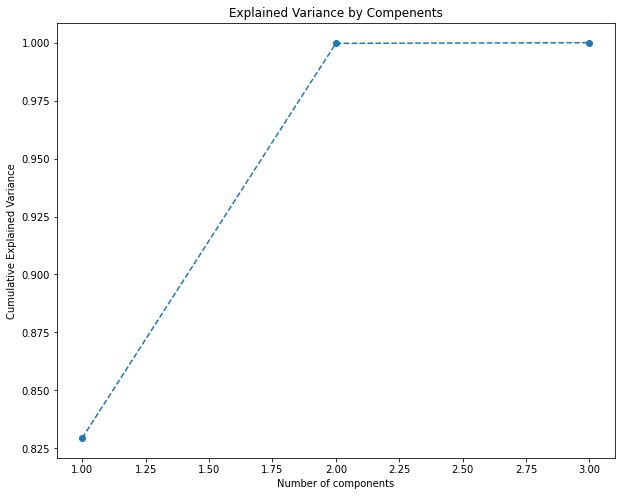

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Compenents')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
pca =PCA(n_components=2)

In [ ]:
pca.fit(scaled_features)

PCA(n_components=2)

In [ ]:
pca.transform(scaled_features)

array([[-1.41114319, -0.38914307],
       [-0.17574032,  1.23253054],
       [-1.03304014, -0.51385111],
       [ 2.61992366, -0.32953636]])

In [ ]:
score_pca = pca.transform(scaled_features)

In [ ]:
wcss = []
for i in range(1,3):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 2022)
  kmeans_pca.fit(score_pca)
  wcss.append(kmeans_pca.inertia_)

# *K-means con PCA clustering*

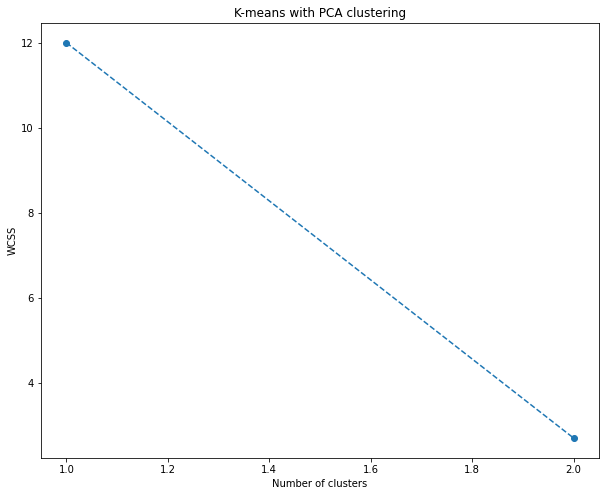

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,3), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering')
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', random_state = 2022)


In [ ]:
kmeans_pca.fit(score_pca)

KMeans(n_clusters=2, random_state=2022)

In [ ]:
customer_df_pca_kmeans = pd.concat([customer_df.reset_index(drop = True), pd.DataFrame(score_pca)], axis =1)
customer_df_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Componente 2', 'Componente 3']
customer_df_pca_kmeans['Segment K-Means PCA'] = kmeans_pca.labels_

In [ ]:
customer_df_pca_kmeans.head()

,Mean,Sum,Max,Component 1,Componente 2,Componente 3,Segment K-Means PCA
0,380.238095,23955,2215,2,-1.411143,-0.389143,0
1,198.734189,851576,10491,0,-0.175740,1.232531,0
2,477.580822,174317,3093,2,-1.033040,-0.513851,0
3,1006.793637,2341802,13483,1,2.619924,-0.329536,1


In [ ]:
customer_df_pca_kmeans['Segment'] = customer_df_pca_kmeans['Segment K-Means PCA'].map({0:'first',
                                                                                       1:'second',
                                                                                       2:'third',
                                                                                       3:'fourth'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



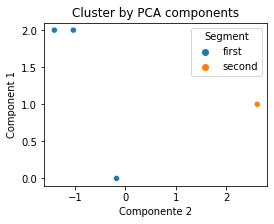

In [ ]:
x_axis = customer_df_pca_kmeans['Componente 2']
y_axis = customer_df_pca_kmeans['Component 1']
plt.figure(figsize =(4,3))
sns.scatterplot(x_axis, y_axis, hue = customer_df_pca_kmeans['Segment'])
plt.title('Cluster by PCA components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



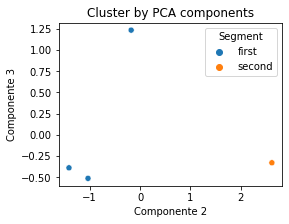

In [ ]:
x_axis = customer_df_pca_kmeans['Componente 2']
y_axis = customer_df_pca_kmeans['Componente 3']
plt.figure(figsize =(4,3))
sns.scatterplot(x_axis, y_axis, hue = customer_df_pca_kmeans['Segment'])
plt.title('Cluster by PCA components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



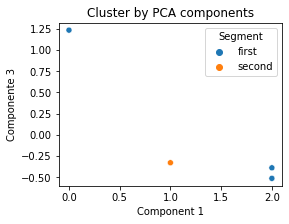

In [ ]:
x_axis = customer_df_pca_kmeans['Component 1']
y_axis = customer_df_pca_kmeans['Componente 3']
plt.figure(figsize =(4,3))
sns.scatterplot(x_axis, y_axis, hue = customer_df_pca_kmeans['Segment'])
plt.title('Cluster by PCA components')
plt.show()